In [1]:
import sys
import numpy as np
sys.path.append("..")
sys.path.append("../sage")

In [2]:
!pwd

/Users/usin8611/Documents/code_sydney/codes_anisotropy/anisotropy/notebooks


# 1. Import a phase information

In [3]:
import constants

Almandine-pyrope
Grossular
Majorite
Pyrope
a_quartz_1
a_quartz_2
a_Quartz_3
a_quartz_4
a_quartz_696C
a_quartz_700C
Calcite_1
Calcite_2
Forsterite (San Carlos)
Fayalite (0.3GPa)
Lawsonite
Orthoenstatite (MgSiO3)
Orthoenstatite (MgSiO3)
Enstatite
Bronzite (Mg0.8Fe0.2SiO3)
Ferrosilite (FeSiO3)
Biotite
Muscovite
Phlogopite
Illite-smectite
Dickite
Augite
Diopside (Di72He9Jd3Cr3Ts12)
Chrome-diopside
Jadeite
Omphacite
Coesite
Amphobole #1 Richterite1
Amphobole #2 Kataphorite1
Amphobole #3 Taramite-Tschermakite1
Amphobole #4 Hornblende-Tschermakite1
Amphobole #5 Tremolite1
Amphobole #6 Edenite1
Amphobole #7 Edenite1
Amphobole #8 Pargasite1
Amphobole #9 Pargasite1
Hornblende (#1)
Hornblende (#2)
Glaucophane
Sanidine (Or83Ab15)
Sanidine (Or89Ab11)
Orthoclase (Or93Ab7)
Albite (Or0Ab100)
An0 (Albite)
An25 (Oligoclase)
An37 (Andesine)
An48 (Andesine)
An60 (Labradorite)
An67 (Labradorite)
An78 (Bytownite)
An96 (Anorthite)
Kaolinite
Nacrite


In [4]:
constants.constants_help('phase')

Almandine-pyrope
Grossular
Majorite
Pyrope
a_quartz_1
a_quartz_2
a_Quartz_3
a_quartz_4
a_quartz_696C
a_quartz_700C
Calcite_1
Calcite_2
Forsterite (San Carlos)
Fayalite (0.3GPa)
Lawsonite
Orthoenstatite (MgSiO3)
Orthoenstatite (MgSiO3)
Enstatite
Bronzite (Mg0.8Fe0.2SiO3)
Ferrosilite (FeSiO3)
Biotite
Muscovite
Phlogopite
Illite-smectite
Dickite
Augite
Diopside (Di72He9Jd3Cr3Ts12)
Chrome-diopside
Jadeite
Omphacite
Coesite
Amphobole #1 Richterite1
Amphobole #2 Kataphorite1
Amphobole #3 Taramite-Tschermakite1
Amphobole #4 Hornblende-Tschermakite1
Amphobole #5 Tremolite1
Amphobole #6 Edenite1
Amphobole #7 Edenite1
Amphobole #8 Pargasite1
Amphobole #9 Pargasite1
Hornblende (#1)
Hornblende (#2)
Glaucophane
Sanidine (Or83Ab15)
Sanidine (Or89Ab11)
Orthoclase (Or93Ab7)
Albite (Or0Ab100)
An0 (Albite)
An25 (Oligoclase)
An37 (Andesine)
An48 (Andesine)
An60 (Labradorite)
An67 (Labradorite)
An78 (Bytownite)
An96 (Anorthite)
Kaolinite
Nacrite


In [5]:
# voigt_ = np.array(constants.get_voigt_phase("Nacrite"))
# print(voigt_)
voigt_ = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
                [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
                [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
                [  0.,      0.,      0.,     65.66,    0.,      6.415],
                [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
                [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])
voigt_ = voigt_*10**9

# 1. Tensor to voigt conversion and voigt to tensor conversion

In [6]:
import tensor_conversion

In [7]:
voigt_stiffness = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
                [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
                [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
                [  0.,      0.,      0.,     65.66,    0.,      6.415],
                [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
                [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])

In [8]:
tensor = tensor_conversion.voigt_to_tensor(voigt_stiffness)

print(np.array(tensor))

[[[[198.96    0.      9.735]
   [  0.     73.595   0.   ]
   [  9.735   0.     68.185]]

  [[  0.     65.18    0.   ]
   [ 65.18    0.      6.415]
   [  0.      6.415   0.   ]]

  [[  9.735   0.     60.23 ]
   [  0.      6.295   0.   ]
   [ 60.23    0.     33.85 ]]]


 [[[  0.     65.18    0.   ]
   [ 65.18    0.      6.415]
   [  0.      6.415   0.   ]]

  [[ 73.595   0.      6.295]
   [  0.    155.94    0.   ]
   [  6.295   0.     62.23 ]]

  [[  0.      6.415   0.   ]
   [  6.415   0.     65.66 ]
   [  0.     65.66    0.   ]]]


 [[[  9.735   0.     60.23 ]
   [  0.      6.295   0.   ]
   [ 60.23    0.     33.85 ]]

  [[  0.      6.415   0.   ]
   [  6.415   0.     65.66 ]
   [  0.     65.66    0.   ]]

  [[ 68.185   0.     33.85 ]
   [  0.     62.23    0.   ]
   [ 33.85    0.    225.99 ]]]]


In [9]:
voigt = tensor_conversion.tensor_to_voigt(tensor)

In [10]:
print(np.array(voigt))

print(voigt == voigt_stiffness)

[[198.96   73.595  68.185   0.      9.735   0.   ]
 [ 73.595 155.94   62.23    0.      6.295   0.   ]
 [ 68.185  62.23  225.99    0.     33.85    0.   ]
 [  0.      0.      0.     65.66    0.      6.415]
 [  9.735   6.295  33.85    0.     60.23    0.   ]
 [  0.      0.      0.      6.415   0.     65.18 ]]
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


In [11]:
cijkl = tensor_conversion.voigt_to_tensor(voigt)
print(np.array(cijkl))
print(cijkl == tensor)

[[[[198.96    0.      9.735]
   [  0.     73.595   0.   ]
   [  9.735   0.     68.185]]

  [[  0.     65.18    0.   ]
   [ 65.18    0.      6.415]
   [  0.      6.415   0.   ]]

  [[  9.735   0.     60.23 ]
   [  0.      6.295   0.   ]
   [ 60.23    0.     33.85 ]]]


 [[[  0.     65.18    0.   ]
   [ 65.18    0.      6.415]
   [  0.      6.415   0.   ]]

  [[ 73.595   0.      6.295]
   [  0.    155.94    0.   ]
   [  6.295   0.     62.23 ]]

  [[  0.      6.415   0.   ]
   [  6.415   0.     65.66 ]
   [  0.     65.66    0.   ]]]


 [[[  9.735   0.     60.23 ]
   [  0.      6.295   0.   ]
   [ 60.23    0.     33.85 ]]

  [[  0.      6.415   0.   ]
   [  6.415   0.     65.66 ]
   [  0.     65.66    0.   ]]

  [[ 68.185   0.     33.85 ]
   [  0.     62.23    0.   ]
   [ 33.85    0.    225.99 ]]]]
True


# 2. Tensor rotation

In [12]:
import tensor_rotation
import tensor_conversion

In [13]:
import numpy as np
import pandas as pd
M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
             [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
             [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
             [  0.,      0.,      0.,     65.66,    0.,      6.415],
             [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
              [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])

tensor = tensor_conversion.voigt_to_tensor(voigt_)

print("Original tensor in voigt matrix convention:")
print(pd.DataFrame(np.array(tensor_conversion.tensor_to_voigt(tensor))))

alpha = 30 # Rotation angle around x axis in degrees
beta = 50 # Rotation angle around y axis in degrees
gamma = 80    # Rotation angle around z axis in degrees
output = tensor_rotation.rotate_tensor(tensor, alpha, beta, gamma)

Original tensor in voigt matrix convention:
              0             1             2             3             4   
0  1.989600e+11  7.359500e+10  6.818500e+10  0.000000e+00  9.735000e+09  \
1  7.359500e+10  1.559400e+11  6.223000e+10  0.000000e+00  6.295000e+09   
2  6.818500e+10  6.223000e+10  2.259900e+11  0.000000e+00  3.385000e+10   
3  0.000000e+00  0.000000e+00  0.000000e+00  6.566000e+10  0.000000e+00   
4  9.735000e+09  6.295000e+09  3.385000e+10  0.000000e+00  6.023000e+10   
5  0.000000e+00  0.000000e+00  0.000000e+00  6.415000e+09  0.000000e+00   

              5  
0  0.000000e+00  
1  0.000000e+00  
2  0.000000e+00  
3  6.415000e+09  
4  0.000000e+00  
5  6.518000e+10  


In [14]:
import pandas as pd
print("Output rotated tensor in voigt matrix convention:")
print(pd.DataFrame(np.array(tensor_conversion.tensor_to_voigt(output))))

Output rotated tensor in voigt matrix convention:
              0             1             2             3             4   
0  1.636937e+11  5.522020e+10  7.733802e+10  5.086870e+09  7.071287e+09  \
1  5.522020e+10  1.625955e+11  8.012064e+10  2.703473e+09  1.693446e+09   
2  7.733802e+10  8.012064e+10  2.372631e+11 -1.649570e+10  1.009847e+10   
3  5.086870e+09  2.703473e+09 -1.649570e+10  7.242763e+10 -3.653123e+09   
4  7.071287e+09  1.693446e+09  1.009847e+10 -3.653123e+09  7.387293e+10   
5 -5.303336e+09  6.120997e+09 -4.779734e+09  3.255414e+09 -5.746486e+08   

              5  
0 -5.303336e+09  
1  6.120997e+09  
2 -4.779734e+09  
3  3.255414e+09  
4 -5.746486e+08  
5  5.343829e+10  


# 3. Calculating Christoffel tensors

In [15]:
import christoffel

In [16]:
import tensor_conversion
tensor_M = tensor_conversion.voigt_to_tensor(voigt_)
stiffness = tensor_M
direction = np.array([1, 0, 0])
density = 3500.0
christoffel_t = christoffel.christoffel_tensor(stiffness, direction)
wave_moduli, velocities, polarization_directions = christoffel.wave_properties(christoffel_t, density)
print("Christoffel tensor:")
print(christoffel_t)
print("Wave moduli:")
print(wave_moduli)
print("Velocities:")
print(velocities)
print("Polarization directions:")
print(polarization_directions)

Direction:  [1. 0. 0.]
Christoffel tensor:
[[1.9896e+11 0.0000e+00 9.7350e+09]
 [0.0000e+00 6.5180e+10 0.0000e+00]
 [9.7350e+09 0.0000e+00 6.0230e+10]]
Wave moduli:
[199639796023.68756, 65180000000.00001, 59550203976.312416]
Velocities:
[7552.479177134724, 4315.420853503994, 4124.844723529859]
Polarization directions:
[[ 0.99757076  0.         -0.06966047]
 [ 0.          1.          0.        ]
 [ 0.06966047  0.          0.99757076]]


# 4. Calculating velocity

In [17]:
import christoffel_wave_prop

In [18]:
import numpy as np
import tensor_conversion

cijkl = tensor_conversion.voigt_to_tensor(voigt_)
rho = 3500

# Calculate vp, vs1 and vs2 over all the directions possible
vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
# Print vp, vs1 and vs2
print("The values of vp are:")
print("Min Vp: ", min(vp)/1000)
print("Max Vp: ", max(vp)/1000)
print("The values of vs1 are:")
print("Min Vs1: ", min(vs1)/1000)
print("Max Vs1: ", max(vs1)/1000)
print("The values of vs2 are:")
print("Min Vs2: ", min(vs2)/1000)
print("Max Vs2: ", max(vs2)/1000)
print(200*((max(vp)-min(vp))/(max(vp)+min(vp))))

The values of vp are:
Min Vp:  6.674899678218821
Max Vp:  8.609687354376568
The values of vs1 are:
Min Vs1:  3.9755539348056756
Max Vs1:  4.7153920922273524
The values of vs2 are:
Min Vs2:  3.680816097015434
Max Vs2:  4.528474076886109
25.3168459446328


# 5. Anisotropy plot

/Users/usin8611/Documents/code_sydney/codes_anisotropy/anisotropy/notebooks/../sage/cijkl_2dplots_vp.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels(['{:.1f}'.format(v) for v in cb.get_ticks()])


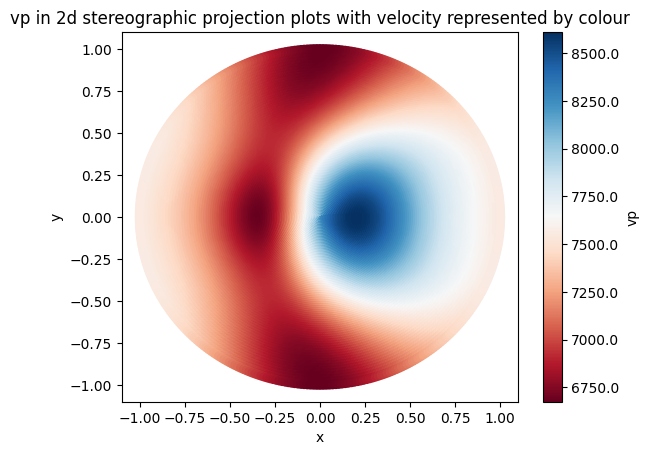

In [19]:
import tensor_conversion
# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
import cijkl_2dplots_vp
M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
                [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
                [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
                [  0.,      0.,      0.,     65.66,    0.,      6.415],
                [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
                [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])*10**9

cijkl = tensor_conversion.voigt_to_tensor(voigt_)

rho = 3500

# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
cijkl_2dplots_vp.plot_vp_2d(cijkl, rho)

# Loops

In [20]:
import elastictensors

In [21]:
elastictensors.calculate_tensor_deriv("enstatite", 1, 200)

array([[243.16,  87.83,  91.87,   0.  ,   0.  ,   0.  ],
       [ 87.83, 172.97,  86.44,   0.  ,   0.  ,   0.  ],
       [ 91.87,  86.44, 231.98,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,  85.44,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,  79.78,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  81.86]])

In [22]:
pressure = np.linspace(0, 20, 11)
temperature = np.linspace(300, 1500, 11)

In [23]:
vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant = elastictensors.calculate_tensor_deriv("enstatite", p, temp)*10**9
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, max(vp)])
        

In [24]:
x = list()
y = list()
z= list()
for x_, y_, z_ in vp_list:
    x.append(x_)
    y.append(y_)
    z.append(z_)

In [25]:
#dIOPSIDE

import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 21)
yi = np.linspace(min(y), max(y), 21)
zi = z.reshape(len(xi), len(yi))

plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

plt.show()


ValueError: cannot reshape array of size 121 into shape (21,21)

In [ ]:
vp_narray = np.array(vp_list)

In [ ]:
vp_narray.shape

In [ ]:
vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant = elastictensors.calculate_tensor_deriv("diopside", p, temp)*10**9
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, 200*((max(vp)-min(vp))/(max(vp)+min(vp)))])
        

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your list of points is as follows:
# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

# Unzip the list of points
x, y, z = zip(*vp_list)

# Convert lists to numpy arrays for manipulation
x = np.array(x)
y = np.array(y)
z = np.array(z)

# Create a 2D grid for x, y and reshape z to this grid
xi = np.linspace(min(x), max(x), 11)
yi = np.linspace(min(y), max(y), 11)
zi = z.reshape(len(xi), len(yi))

# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

# Show the plot
plt.show()

In [ ]:
#ENSTATITE

import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 11)
yi = np.linspace(min(y), max(y), 11)
zi = z.reshape(len(xi), len(yi))

plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

plt.show()


In [ ]:
vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant = elastictensors.calculate_tensor_deriv("enstatite", p, temp)*10**9
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, min(vp)])

In [ ]:
#ENSTATITE

import matplotlib.pyplot as plt
import numpy as np

# Assuming your list of points is as follows:
# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 11)
yi = np.linspace(min(y), max(y), 11)
zi = z.reshape(len(xi), len(yi))

plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

plt.show()


# Diopside and enstatite and forsterite

In [ ]:
pressure = np.linspace(0, 20, 11)
temperature = np.linspace(300, 1500, 11)

vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant = 0.3*(elastictensors.calculate_tensor_deriv("diopside", p, temp)*10**9)+0.4*(elastictensors.calculate_tensor_deriv("enstatite", p, temp)*10**9)+0.3*(elastictensors.calculate_tensor_deriv("forsterite", p, temp)*10**9)
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, 200*((max(vp)-min(vp))/(max(vp)+min(vp)))])

import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 11)
yi = np.linspace(min(y), max(y), 11)
zi = z.reshape(len(xi), len(yi))

# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

# Show the plot
plt.show()


In [ ]:
pressure = np.linspace(0, 20, 11)
temperature = np.linspace(300, 1500, 11)

vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant = 0.3*(elastictensors.calculate_tensor_deriv("diopside", p, temp)*10**9)+0.4*(elastictensors.calculate_tensor_deriv("enstatite", p, temp)*10**9)+0.3*(elastictensors.calculate_tensor_deriv("forsterite", p, temp)*10**9)
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, max(vp)])

import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 11)
yi = np.linspace(min(y), max(y), 11)
zi = z.reshape(len(xi), len(yi))

# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

# Show the plot
plt.show()


# Forsterite

In [ ]:
pressure = np.linspace(0, 20, 11)
temperature = np.linspace(300, 1500, 11)

vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant =elastictensors.calculate_tensor_deriv("forsterite", p, temp)*10**9
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, max(vp)])

import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 11)
yi = np.linspace(min(y), max(y), 11)
zi = z.reshape(len(xi), len(yi))

# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

# Show the plot
plt.show()


# Min VP SPEEDS

### Diopside

In [ ]:
pressure = np.linspace(0, 20, 11)
temperature = np.linspace(300, 1500, 11)

vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant =elastictensors.calculate_tensor_deriv("diopside", p, temp)*10**9
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, min(vp)])

import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 11)
yi = np.linspace(min(y), max(y), 11)
zi = z.reshape(len(xi), len(yi))

# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

# Show the plot
plt.show()


### Forsterite

In [ ]:
pressure = np.linspace(0, 20, 11)
temperature = np.linspace(300, 1500, 11)

vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant =elastictensors.calculate_tensor_deriv("forsterite", p, temp)*10**9
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, min(vp)])

import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 11)
yi = np.linspace(min(y), max(y), 11)
zi = z.reshape(len(xi), len(yi))

# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

# Show the plot
plt.show()


### Enstatite

In [ ]:
pressure = np.linspace(0, 20, 11)
temperature = np.linspace(300, 1500, 11)

vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant =elastictensors.calculate_tensor_deriv("enstatite", p, temp)*10**9
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, min(vp)])

import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 11)
yi = np.linspace(min(y), max(y), 11)
zi = z.reshape(len(xi), len(yi))

# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

# Show the plot
plt.show()


### 03 0.4 0.5 dio ens fors

In [ ]:
pressure = np.linspace(0, 20, 11)
temperature = np.linspace(300, 1500, 11)

vp_list = list()
for temp in temperature:
    for p in pressure:
        resultant = 0.3*(elastictensors.calculate_tensor_deriv("diopside", p, temp)*10**9)+0.4*(elastictensors.calculate_tensor_deriv("enstatite", p, temp)*10**9)+0.3*(elastictensors.calculate_tensor_deriv("forsterite", p, temp)*10**9)
        rho = 3300
        cijkl = tensor_conversion.voigt_to_tensor(resultant)
        vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
        vp_list.append([temp, p, min(vp)])

import matplotlib.pyplot as plt
import numpy as np

# vp_list = [['x1', 'y1', 'z1'], ['x2', 'y2', 'z2'], ...]  # replace with your actual points

x, y, z = zip(*vp_list)

x = np.array(x)
y = np.array(y)
z = np.array(z)

xi = np.linspace(min(x), max(x), 11)
yi = np.linspace(min(y), max(y), 11)
zi = z.reshape(len(xi), len(yi))

# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.colorbar()  # show color scale

# Show the plot
plt.show()
